### Assemble Results of Speed Benchmarks: k-point parallelization

In [1]:
import os

import pandas as pd


dirname_qe = "./" #"/home/agrimsharma/QuantumMASALA_July2024_measurements/QuantumMASALA/benchmarks/benchmark_speed/kpoint_Fe/kpoints_Fe_21Sep2024/"
dirnames_qtm = ["./"]

qe_files = []
l_qtm_files = []

l_dict_qe = []
l_dict_qtm = []

# Create a Pandas DataFrame to store the data
columns = [
    "numprocs",
    "numcalls_scf",
    "total_time_scf",
    "numcalls_hpsi",
    "total_time_hpsi",
]


for filename in os.listdir(dirname_qe):
    if "qe" in filename:
        qe_files.append(filename)

for i, dirname in enumerate(dirnames_qtm):
    l_qtm_files.append([])
    for filename in os.listdir(dirname):
        if "qtm" in filename:
            l_qtm_files[i].append(filename)

print(qe_files)
print(l_qtm_files)

# Process qe_files separately
for filename in qe_files:
    # Extract information from lines of the form:
    # electrons    :    290.33s CPU    294.56s WALL (       1 calls)
    # h_psi        :    183.07s CPU    184.02s WALL (      85 calls)

    with open(dirname_qe + filename, "r") as f:
        lines = f.readlines()
        for line in lines:

            if line.strip().startswith("electrons    "):
                # Extract the numcalls and total_time
                numcalls_scf = int(line.split()[7])
                total_time_scf = float(line.split()[4][:-1])

            elif line.strip().startswith("h_psi        :"):
                numcalls_hpsi = int(line.split()[7])
                total_time_hpsi = float(line.split()[4][:-1])
        if int(filename.split("_")[3].split(".")[0]) in [14,64]:
            continue
        l_dict_qe.append(
            {
                "numprocs": int(filename.split("_")[3].split(".")[0]),
                "numcalls_scf": numcalls_scf,
                "total_time_scf": total_time_scf,
                "numcalls_hpsi": numcalls_hpsi,
                "total_time_hpsi": total_time_hpsi,
            }
        )

df_qe = pd.DataFrame(data=l_dict_qe, columns=columns)
df_qe.sort_values(by="numprocs", inplace=True)
display(df_qe)

# Process qtm_files separately
l_df_qtm = []
for filenames, dirname in zip(l_qtm_files, dirnames_qtm):
    print(i, filenames, dirname)
    l_dict_qtm.append([])
    for filename in filenames:
        # Extract information from lines of the form:
        # |           scf:scf            |       1|  695.25| STOPPED |
        # |         KSHam:h_psi          |     248|  405.93| STOPPED |
        with open(dirname + filename, "r") as f:
            lines = f.readlines()
            for line in lines:
                if line.strip().startswith("|           scf:scf            "):
                    numcalls_scf = int(line.split("|")[2].strip())
                    total_time_scf = float(line.split("|")[3].strip())
                elif line.strip().startswith("|         KSHam:h_psi          "):
                    numcalls_hpsi = int(line.split("|")[2].strip())
                    total_time_hpsi = float(line.split("|")[3].strip())
            if int(filename.split("_")[3].split(".")[0]) in [14,64]:
                continue
            l_dict_qtm[-1].append(
                {
                    "numprocs": int(filename.split("_")[3].split(".")[0]),
                    "numcalls_scf": numcalls_scf,
                    "total_time_scf": total_time_scf,
                    "numcalls_hpsi": numcalls_hpsi,
                    "total_time_hpsi": total_time_hpsi,
                }
            )

    l_df_qtm.append(pd.DataFrame(data=l_dict_qtm[-1], columns=columns))
    l_df_qtm[-1].sort_values(by="numprocs", inplace=True)
    display(l_df_qtm[-1])






['Fe_qe_nk_1.scf.out', 'Fe_qe_nk_14.scf.out', 'Fe_qe_nk_16.scf.out', 'Fe_qe_nk_2.scf.out', 'Fe_qe_nk_32.scf.out', 'Fe_qe_nk_4.scf.out', 'Fe_qe_nk_56.scf.out', 'Fe_qe_nk_64.scf.out', 'Fe_qe_nk_8.scf.out']
[['Fe_qtm_nk_1.scf.out', 'Fe_qtm_nk_14.scf.out', 'Fe_qtm_nk_16.scf.out', 'Fe_qtm_nk_2.scf.out', 'Fe_qtm_nk_32.scf.out', 'Fe_qtm_nk_4.scf.out', 'Fe_qtm_nk_56.scf.out', 'Fe_qtm_nk_64.scf.out', 'Fe_qtm_nk_8.scf.out']]


,numprocs,numcalls_scf,total_time_scf,numcalls_hpsi,total_time_hpsi
0,1,1,11415.20,767985,8283.25
2,2,1,7459.38,503570,5448.08
4,4,1,2547.46,168153,1765.62
6,8,1,1757.40,105430,1201.14
1,16,1,869.93,53923,569.66
3,32,1,405.59,22061,257.08
5,56,1,331.27,13721,214.35


0 ['Fe_qtm_nk_1.scf.out', 'Fe_qtm_nk_14.scf.out', 'Fe_qtm_nk_16.scf.out', 'Fe_qtm_nk_2.scf.out', 'Fe_qtm_nk_32.scf.out', 'Fe_qtm_nk_4.scf.out', 'Fe_qtm_nk_56.scf.out', 'Fe_qtm_nk_64.scf.out', 'Fe_qtm_nk_8.scf.out'] ./


,numprocs,numcalls_scf,total_time_scf,numcalls_hpsi,total_time_hpsi
0,1,1,9748.04,692283,5813.39
2,2,1,4978.79,337008,2906.67
4,4,1,2513.72,168275,1431.96
6,8,1,1319.79,84157,770.29
1,16,1,738.64,43589,396.40
3,32,1,511.08,20996,306.10
5,56,1,447.77,12169,277.43


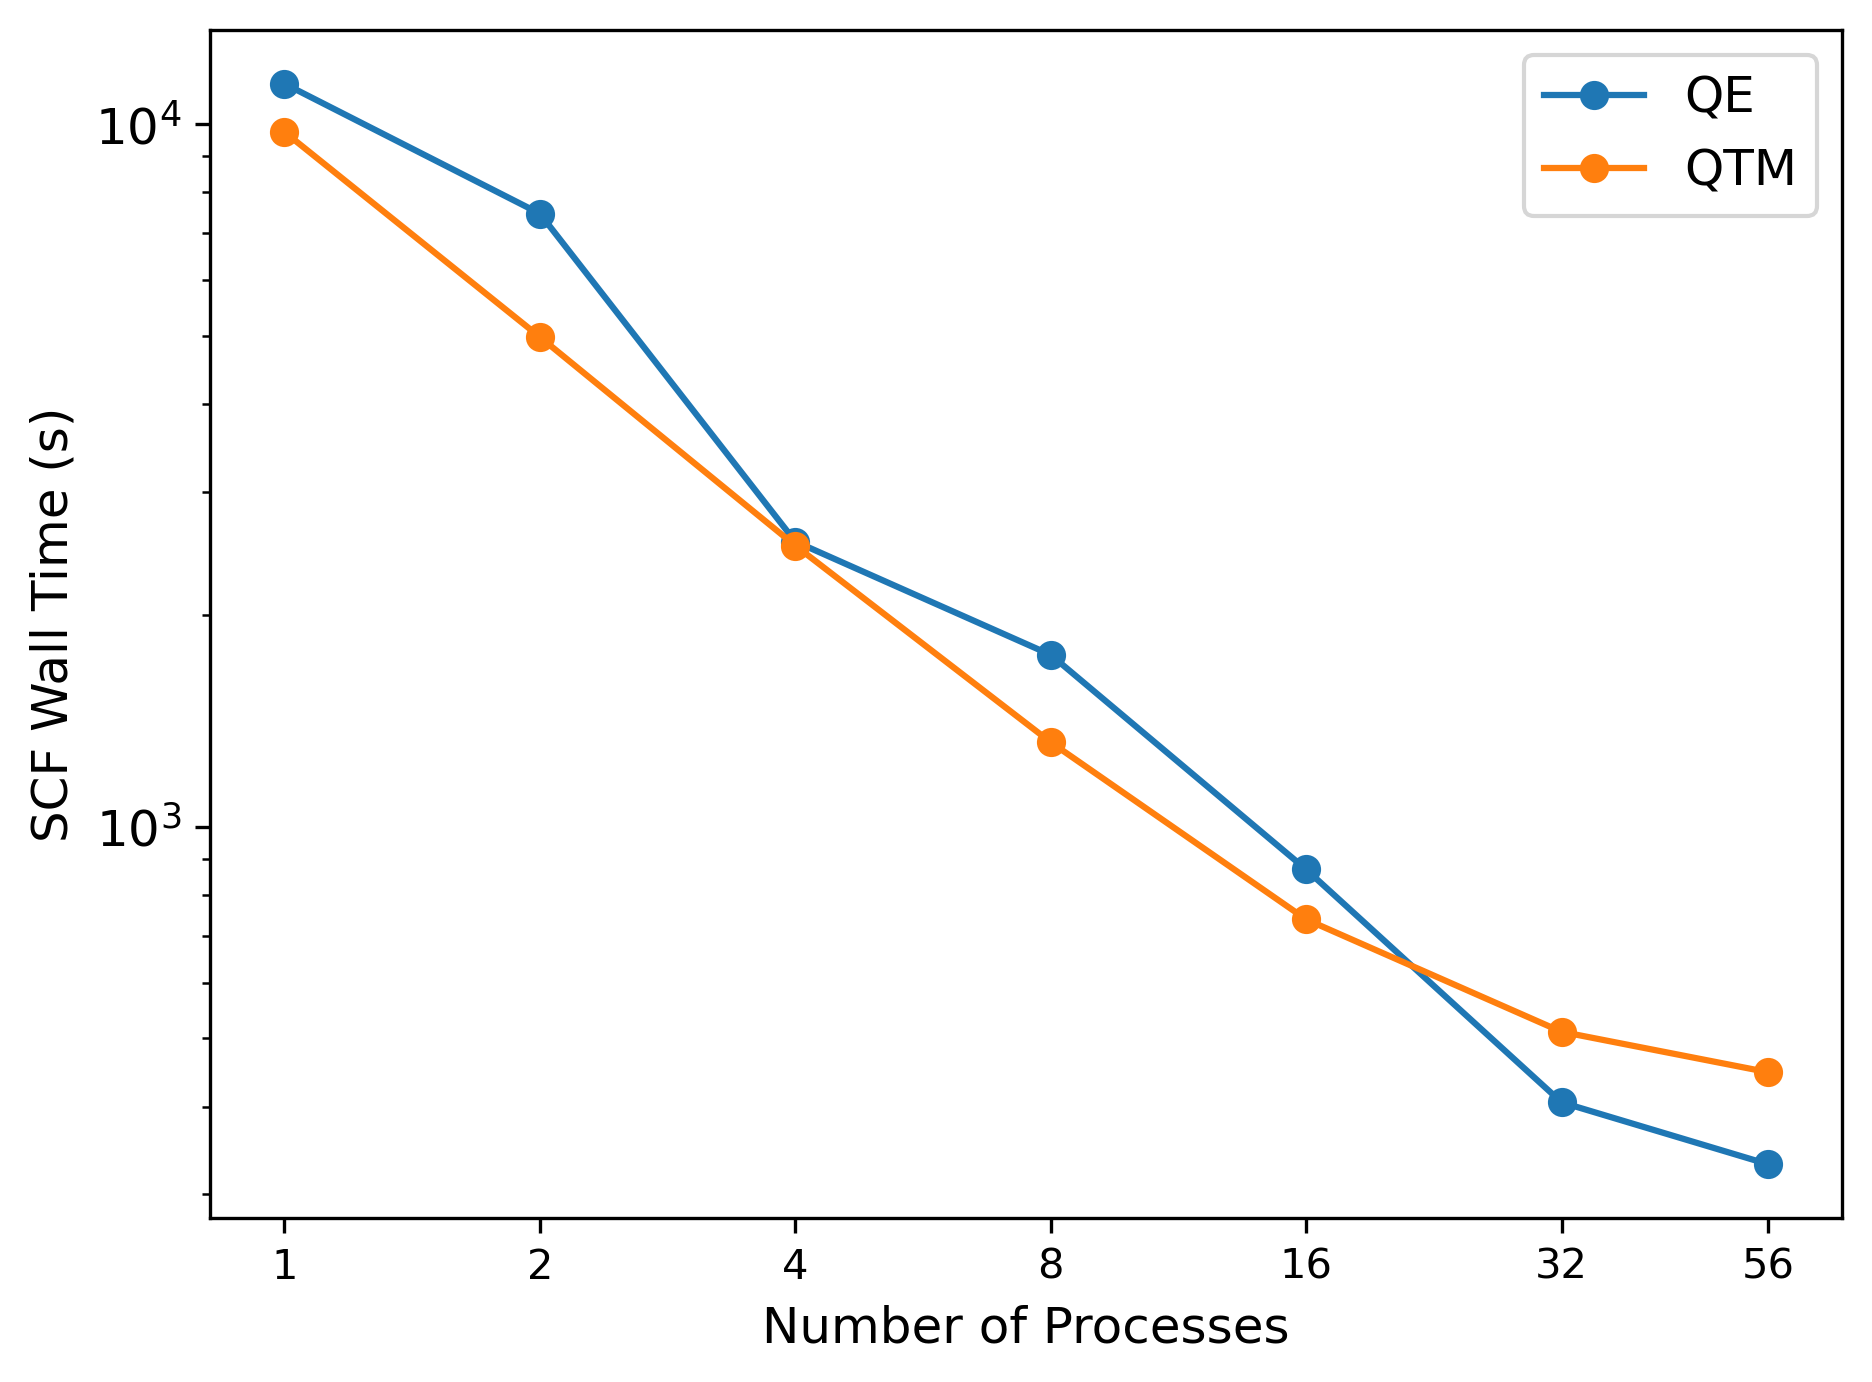

In [2]:
# Plot total_time_scf vs numprocs for both qe and qtm on the same plot
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.size"] = 12

# Increase DPI
plt.rcParams['figure.dpi'] = 300

qtty = "total_time_scf"
# qtty = "total_time_hpsi"

plt.plot(df_qe["numprocs"], df_qe[qtty], label="QE", marker="o")
# plt.plot(df_qe["numprocs"], df_qe[qtty][7]/df_qe["numprocs"], label="1.1xQE", linestyle="--")
for i, df_qtm in enumerate(l_df_qtm):
    label = "QTM" if i==0 else "QTM"+str(i)
    # if i==0:    
    #     # Plot ideal scaling of total_time_scf vs numprocs for qtm, starting for numprocs=1
    #     plt.plot(df_qtm["numprocs"], list(df_qtm[qtty])[0] / df_qtm["numprocs"], label="Ideal Scaling", linestyle="--")
    plt.plot(df_qtm["numprocs"], df_qtm[qtty], label=label, marker="o")
        
# plt.plot(df_qtm["numprocs"], df_qtm[qtty], label="QTM", marker="o")


plt.xlabel("Number of Processes")
plt.ylabel("SCF Wall Time (s)")
plt.yscale("log")
plt.xscale("log")
plt.legend()
# plt.title("k-Point Parallelization of SCF")
plt.tight_layout()
plt.xticks(df_qe["numprocs"], labels=df_qe["numprocs"], fontsize='small')
plt.tick_params(axis='x', which='minor', bottom=False)
# plt.show()

plt.savefig("kpoints_fe.png")
plt.savefig("kpoints_fe.pdf")


In [5]:
# Merge the dataframes of qe and qtm
df_merged = df_qe.merge(l_df_qtm[0], on="numprocs", suffixes=("_qe", "_qtm"))
# Remove certain columns:
df_merged.drop(columns=["numcalls_scf_qtm", "numcalls_scf_qe"], inplace=True)
# Arrange the columns in a certain order
df_merged = df_merged[["numprocs", "total_time_scf_qe", "total_time_scf_qtm", "numcalls_hpsi_qe", "numcalls_hpsi_qtm"]]
# Change titles in the table
df_merged.columns = ["Number of Processes", "QE SCF Wall Time (s)", "QTM SCF Wall Time (s)", "QE h_psi Calls", "QTM h_psi Calls"]
# Convert the times to integer type
df_merged["QE SCF Wall Time (s)"] = df_merged["QE SCF Wall Time (s)"].astype(int)
df_merged["QTM SCF Wall Time (s)"] = df_merged["QTM SCF Wall Time (s)"].astype(int)
display(df_merged)
df_merged.to_csv("kpoints_fe.csv", index=False)

,Number of Processes,QE SCF Wall Time (s),QTM SCF Wall Time (s),QE h_psi Calls,QTM h_psi Calls
0,1,11415,9748,767985,692283
1,2,7459,4978,503570,337008
2,4,2547,2513,168153,168275
3,8,1757,1319,105430,84157
4,16,869,738,53923,43589
5,32,405,511,22061,20996
6,56,331,447,13721,12169
